Reference
[link text](https://medium.com/@tejpal.abhyuday/trocr-transformer-based-optical-recognition-model-811f7b3217da)

In [ ]:
!pip install transformers
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
from IPython.display import display
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-handwritten")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.4 MB/s eta 0:00:00


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def show_image(pathStr):
  img = Image.open(pathStr).convert("RGB")
  display(img)
  return img

def ocr_image(src_img):
  pixel_values = processor(images=src_img, return_tensors="pt").pixel_values
  generated_ids = model.generate(pixel_values)
  return processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

# Hand Written Text

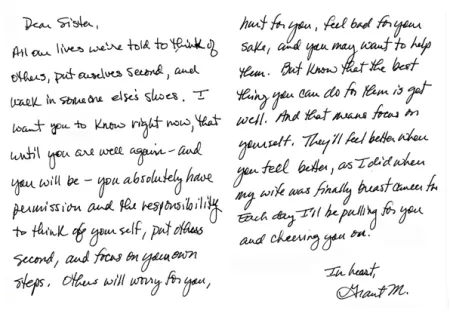

In [ ]:
hw_image = show_image('/content/HWLetter.png')

In [ ]:
ocr_image(hw_image)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'0 0'

In [ ]:
hw_image1 = hw_image.crop((0, 10, hw_image.size[0], 40))
display(hw_image1)

In [ ]:
ocr_image(hw_image1)

'Dean Sister, but for you, feel bad for years,'

# Printed Images and Scans

In [ ]:
printed_processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
printed_model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed')

def ocr_printed_image(src_img):
  pixel_values = printed_processor(images=src_img, return_tensors="pt").pixel_values
  generated_ids = printed_model.generate(pixel_values)
  return printed_processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


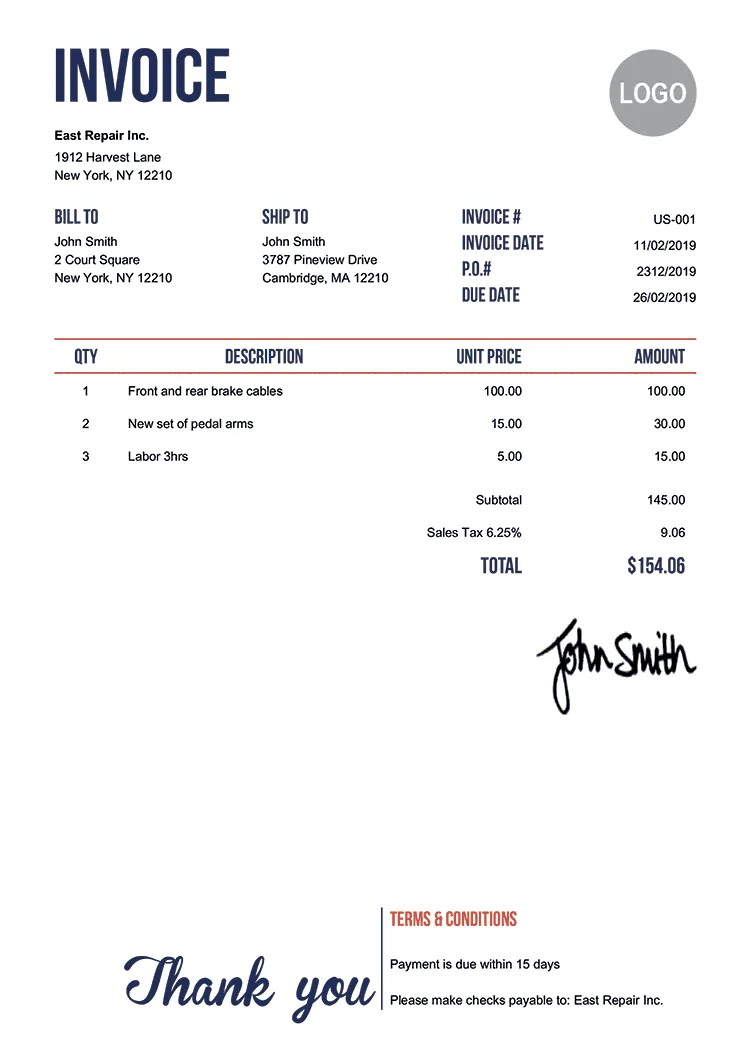

In [ ]:
invoice_image = show_image('/content/Invoice1.png')

In [ ]:
invoice_image1 = invoice_image.crop((0, 200, invoice_image.size[0], 225))
display(invoice_image1)

In [ ]:
ocr_image(invoice_image1)

'Dean Sister, but for you, feel bad for years,'